# Bishop Chapter 2

In [1]:
include("../src/prml/distributions/distributions.jl")

using Plots
using .distributions

## Bernoulli Distribution

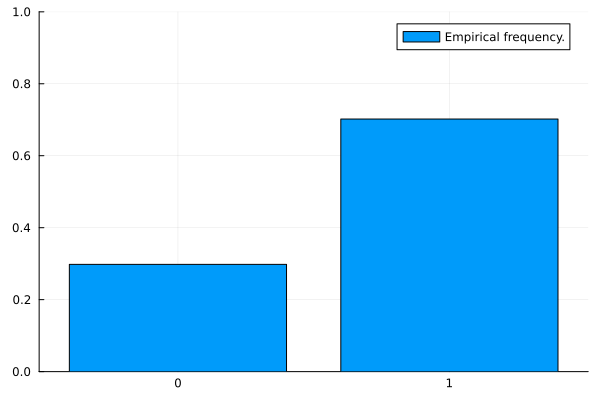

In [2]:
#Plot empirical pdf based on N trials
dist = Bernoulli(0.7)
N = 1000
X = map(x -> sample(dist), 1:N)
p_zero = count(x -> x==0, X)/length(X)
p_one = count(x -> x==1, X)/length(X)
bar([0, 1], [p_zero, p_one], ylim=(0, 1), xticks=[0,1], label="Empirical frequency.")

## Binomial Distribution

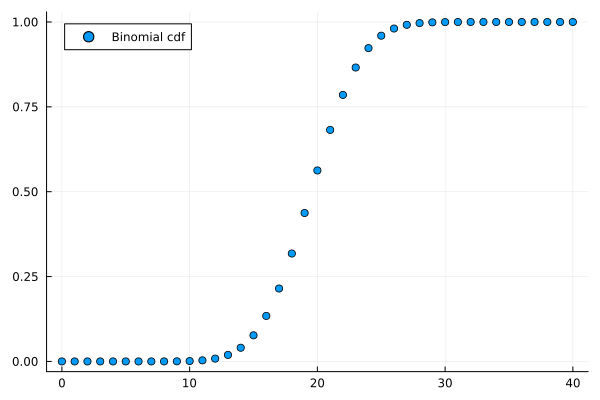

In [3]:
#Plot analytical cdf
trials = 40
mu = 0.5
dist = Binomial(mu, trials)
X = collect(0:trials)
cumul = map(x -> cdf(dist, x), X)
plot(X, cumul, seriestype=:scatter, label="Binomial cdf")

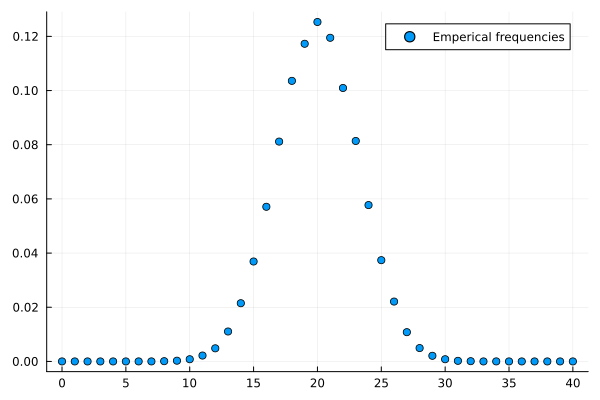

In [4]:
# Plot empirical pdf based on N trials
N = 100000
X = map(x -> sample(dist), 1:N)
occurrences = map(x -> count(y -> y == x, X), 0:trials)
probabilities = occurrences./N
plot(0:trials, probabilities, seriestype=:scatter, xticks=0:5:trials, label="Emperical frequencies")

## Beta Distibution

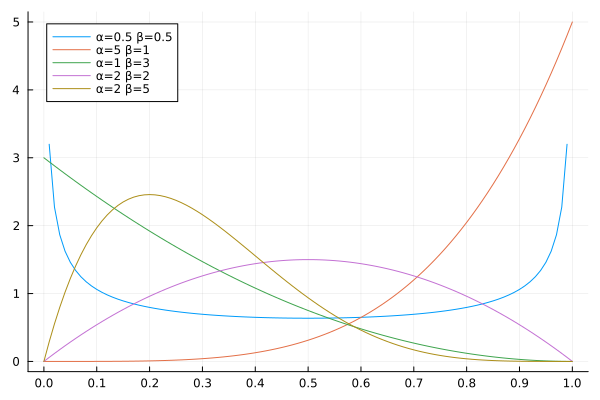

In [9]:
#Plot analytical pdfs for various values of α and β
params = [(0.5, 0.5), (5, 1), (1, 3), (2, 2), (2, 5)]

fig = plot()
for (a, b) in params
    dist = Beta(a, b)
    X = collect(0:0.01:1)
    p = map(x -> pdf(dist, x), X)
    plot!(X, p, seriestype=:line, xticks=0:0.1:1, label="α=$a β=$b")
end
display(fig)

In [10]:
# Updating a beta distribution
# Based on data
prior = Beta(1, 1)
data = [1, 0, 0, 1, 1, 1, 1]
println(calibrate(prior, data))

# With a known posterior
likelihood = Binomial(0.75, 40)
exp_succ = mean(likelihood)
println(calibrate(prior, likelihood))

Beta{Int64}(6, 3)
Beta{Float64}(31.0, 11.0)


## Categorical Distribution

Most common element: banana


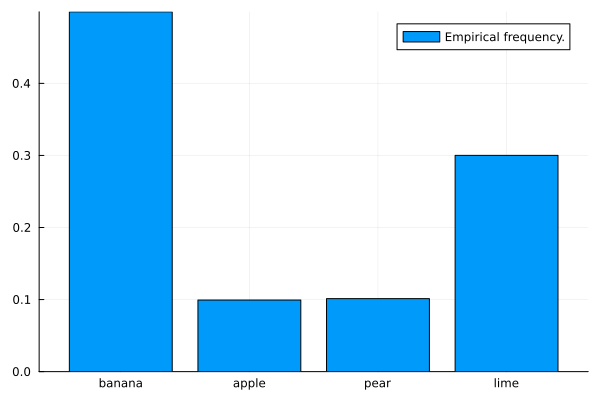

In [5]:
elements = ["banana", "apple", "banana", "banana", "pear", "lime", "lime", "banana", "lime", "banana"]
dist, cats = mle(Categorical, elements)
trials = 100000
X = sum(map(x -> sample(dist), 1:trials))/trials
println("Most common element: $(cats[mode(dist)])")
bar(cats, X, label = "Empirical frequency.")

## Multinomial Distribution

Probability of max throw: 0.004629629629629629


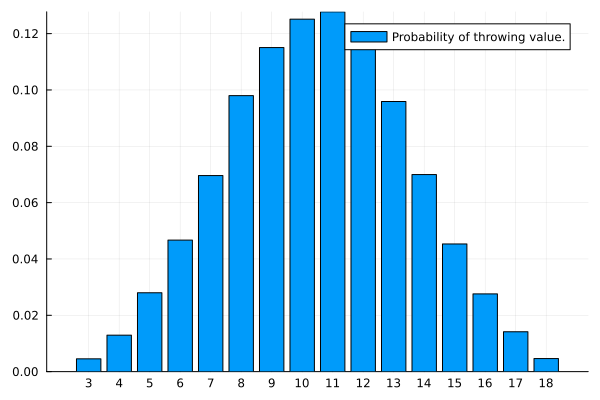

In [2]:
# Empirical frequency of throwing certain values with n_dice dice.
n_dice = 3
val_range = collect(1*n_dice:6*n_dice)
sides = collect(1:6)
p = [1//6 for side in sides]
dice = Multinomial(p, n_dice)

# Sample
N = 100000
rolls = []
for i in 1:N
    roll = sample(dice)
    roll_val = sum(sides.*roll)
    push!(rolls, roll_val)
end

# Analytical Probability of throwing max
max_throw = [0, 0, 0, 0, 0, n_dice]
println("Probability of max throw: $(pdf(dice, max_throw))")

# Plot
prob = [count(==(value), rolls) for value in sort(unique(rolls))]./N
bar(val_range, prob, xticks=val_range, label="Probability of throwing value.")